In [1]:
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.cuda
import torch.optim as optim
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from torch.nn.functional import relu
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from AE import *

In [2]:
TRAIN_ALL_SKELETONS_PATH = "C:/Users/André/OneDrive 2/OneDrive/Skrivebord/bsc_data/latent_space_data_min_loss/train/"
VAL_ALL_SKELETONS_PATH = "C:/Users/André/OneDrive 2/OneDrive/Skrivebord/bsc_data/latent_space_data_min_loss/val/"

SAVING_PATH_ALL = "C:/Users/André/OneDrive 2/OneDrive/Skrivebord/bsc_data/latent_space_data_min_loss/AE_models/"

In [3]:
class dataset(Dataset):
    def __init__(self, PATH):
        self.path = PATH
        self.data = os.listdir(self.path)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, i):
        return np.load(self.path + self.data[i])

In [4]:
LEARNING_RATE = 5e-4
NUM_EPOCHS = 100
MINI_BATCH_SIZE = 16
criterion = nn.MSELoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
AE = AE().to(device)
optimizer = optim.SGD(AE.parameters(), lr = LEARNING_RATE, momentum = 0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 25, gamma = 0.5)

In [5]:
train_dataset_all = dataset(TRAIN_ALL_SKELETONS_PATH)
train_dataloader_all = DataLoader(train_dataset_all, batch_size = MINI_BATCH_SIZE)
val_dataset_all = dataset(VAL_ALL_SKELETONS_PATH)
val_dataloader_all = DataLoader(val_dataset_all, batch_size = 1)

In [6]:
""" FITTING ON ALL SKELETONS """

torch.cuda.empty_cache()
train_losses = []
val_losses = []

for epoch in tqdm(range(NUM_EPOCHS), desc = "EPOCH"):
    AE.train()
    print("Epoch:", epoch)
    train_losses = np.append(train_losses, 0)
    for x in tqdm(train_dataloader_all, desc = "TRAINING", leave = False, total = len(train_dataloader_all)):

        # Prework
        x = x.to(device, dtype = torch.float)

        # Prediction
        pred = AE(x, add_noise = True)

        # Backpropegation
        optimizer.zero_grad()

        # Train loss
        train_loss = criterion(pred, x)
        train_losses[-1] += train_loss.item()

        # Backpropegation
        train_loss.backward()
        optimizer.step()

    train_losses[-1] /= len(train_dataloader_all)
    print("     Train loss:", train_losses[-1])

    # Validation
    with torch.no_grad():
        AE.eval()
        val_losses = np.append(val_losses, 0)
        #for x_val in tqdm(X_val, desc = "Validation", leave = False):
        for x_val in tqdm(val_dataloader_all, desc = "VALIDATING", leave = False, total = len(val_dataloader_all)):

            # Prework
            x_val = x_val.to(device, dtype = torch.float)

            # Prediction
            pred = AE(x_val, add_noise = False)

            # Validation loss
            val_loss = criterion(pred, x_val)
            val_losses[-1] += val_loss.item()

    val_losses[-1] /= len(val_dataloader_all)

    scheduler.step()
    
    print("     Validation loss:", val_losses[-1])

Epoch: 0


     Train loss: 9.942323426592662


     Validation loss: 8.508845883687902
Epoch: 1


     Train loss: 9.01172232255772


     Validation loss: 8.048080716252704
Epoch: 2


     Train loss: 8.635077930367041


     Validation loss: 7.717258477969004
Epoch: 3


     Train loss: 8.339229849435645


     Validation loss: 7.545948365664972
Epoch: 4


     Train loss: 8.176642039968293


     Validation loss: 7.397290519440156
Epoch: 5


     Train loss: 8.031620241973563


     Validation loss: 7.283253078612295
Epoch: 6


     Train loss: 7.930629192775686


     Validation loss: 7.207044344566068
Epoch: 7


     Train loss: 7.870226236492468


     Validation loss: 7.16308973972078
Epoch: 8


     Train loss: 7.8297497898351756


     Validation loss: 7.1280262382439155
Epoch: 9


     Train loss: 7.796349417082374


     Validation loss: 7.095247581883629
Epoch: 10


     Train loss: 7.7667524247235304


     Validation loss: 7.076911804729728
Epoch: 11


     Train loss: 7.749431877863203


     Validation loss: 7.061556697480298
Epoch: 12


     Train loss: 7.733381263735862


     Validation loss: 7.045032459812895
Epoch: 13


     Train loss: 7.71662204179182


     Validation loss: 7.033462450261364
Epoch: 14


     Train loss: 7.70403952068411


     Validation loss: 7.021932340558107
Epoch: 15


     Train loss: 7.687772743843086


     Validation loss: 7.001264992812986
Epoch: 16


     Train loss: 7.670844910483998


     Validation loss: 6.992482291908249
Epoch: 17


     Train loss: 7.661047609455429


     Validation loss: 6.982941619051388
Epoch: 18


     Train loss: 7.650574102596084


     Validation loss: 6.971490081593888
Epoch: 19


     Train loss: 7.639818659447461


     Validation loss: 6.962080352231978
Epoch: 20


     Train loss: 7.6263943755456


     Validation loss: 6.9466631499841505
Epoch: 21


     Train loss: 7.613755894740535


     Validation loss: 6.938139664618325
Epoch: 22


     Train loss: 7.585510375160533


     Validation loss: 6.912290896661285
Epoch: 23


     Train loss: 7.576047055385781


     Validation loss: 6.907172845814842
Epoch: 24


     Train loss: 7.571191102569985


     Validation loss: 6.902901686645609
Epoch: 25


     Train loss: 7.5621857976784295


     Validation loss: 6.896725440030037
Epoch: 26


     Train loss: 7.56019503406351


     Validation loss: 6.895069864429946
Epoch: 27


     Train loss: 7.558404843022743


     Validation loss: 6.89336621803695
Epoch: 28


     Train loss: 7.55684398580763


     Validation loss: 6.892299295154416
Epoch: 29


     Train loss: 7.555426616200044


     Validation loss: 6.891171812681602
Epoch: 30


     Train loss: 7.553679591376566


     Validation loss: 6.889208175136015
Epoch: 31


     Train loss: 7.552111124386561


     Validation loss: 6.888085665931634
Epoch: 32


     Train loss: 7.550784265243145


     Validation loss: 6.886732945698321
Epoch: 33


     Train loss: 7.549347050525474


     Validation loss: 6.88543694618189
Epoch: 34


     Train loss: 7.5479956778744395


     Validation loss: 6.884087858041881
Epoch: 35


     Train loss: 7.546578457382253


     Validation loss: 6.88306841329564
Epoch: 36


     Train loss: 7.5452943217842


     Validation loss: 6.88186156210647
Epoch: 37


     Train loss: 7.544080922392342


     Validation loss: 6.880570136634471
Epoch: 38


     Train loss: 7.542875357386405


     Validation loss: 6.8794944260687245
Epoch: 39


     Train loss: 7.541679290653152


     Validation loss: 6.878403404312676
Epoch: 40


     Train loss: 7.540607868125942


     Validation loss: 6.877401646726881
Epoch: 41


     Train loss: 7.539499466086793


     Validation loss: 6.8760498611235885
Epoch: 42


     Train loss: 7.5384626368561145


     Validation loss: 6.8755768133094906
Epoch: 43


     Train loss: 7.537493822206517


     Validation loss: 6.874381728788123
Epoch: 44


     Train loss: 7.53633315711118


     Validation loss: 6.873307967496709
Epoch: 45


     Train loss: 7.535365369355896


     Validation loss: 6.872531274624911
Epoch: 46


     Train loss: 7.534444113354613


     Validation loss: 6.871883845324577
Epoch: 47


     Train loss: 7.53356821894046


     Validation loss: 6.871063732422924
Epoch: 48


     Train loss: 7.5324763313472065


     Validation loss: 6.869833449169546
Epoch: 49


     Train loss: 7.531029244568922


     Validation loss: 6.868351499310226
Epoch: 50


     Train loss: 7.527138902251373


     Validation loss: 6.865316992310739
Epoch: 51


KeyboardInterrupt: 

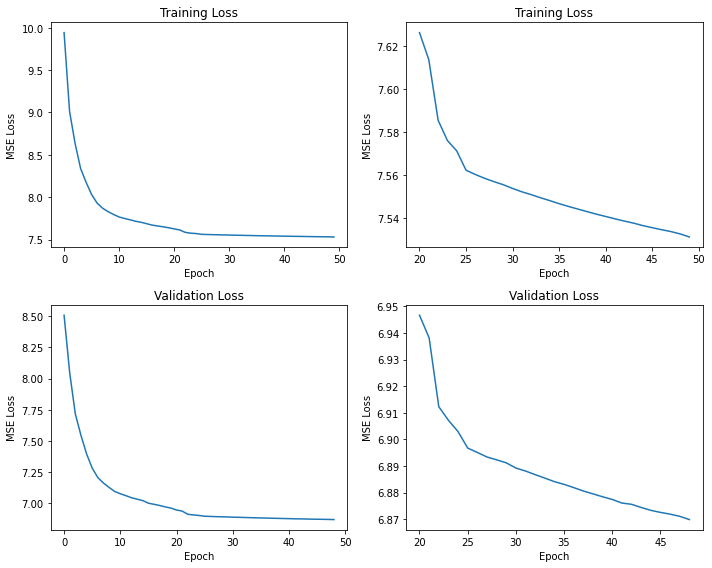

In [13]:
fig, axs = plt.subplots(2, 2, figsize = (10, 8))
n = 20

axs[0, 0].plot(np.arange(0, len(train_losses[:-2])), train_losses[:-2])
axs[0, 0].set_ylabel("MSE Loss")
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_title("Training Loss")

axs[0, 1].plot(np.arange(n, len(train_losses[:-2])), train_losses[:-2][n:])
axs[0, 1].set_ylabel("MSE Loss")
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_title("Training Loss")

axs[1, 0].plot(np.arange(0, len(val_losses[:-2])), val_losses[:-2])
axs[1, 0].set_ylabel("MSE Loss")
axs[1, 0].set_xlabel("Epoch")
axs[1, 0].set_title("Validation Loss")

axs[1, 1].plot(np.arange(n, len(val_losses[:-2])), val_losses[:-2][n:])
axs[1, 1].set_ylabel("MSE Loss")
axs[1, 1].set_xlabel("Epoch")
axs[1, 1].set_title("Validation Loss")

plt.tight_layout()
#plt.savefig("C:/Users/André/OneDrive 2/OneDrive/Skrivebord/AE_evolution_all.png")
plt.show()

In [14]:
np.save(SAVING_PATH_ALL  + "val_loss.npy", val_losses[:-2])
np.save(SAVING_PATH_ALL + "train_loss.npy", train_losses[:-2])
torch.save(AE.state_dict(), SAVING_PATH_ALL + "model.pth")
torch.save(optimizer.state_dict(), SAVING_PATH_ALL + "optimizer.pth")
torch.save(scheduler.state_dict(), SAVING_PATH_ALL + "scheduler.pth")